In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
data = pd.read_csv('Data_set.csv', sep=";", encoding="cp1251")
data2 = pd.read_csv('Data_set2.csv', sep=";", encoding="cp1251")

In [3]:
data.shape

(3458, 8)

In [4]:
data.dtypes

n            int64
id           int64
mac         object
strength     int64
ssid        object
zone         int64
floor        int64
datetime    object
dtype: object

In [5]:
data.isnull().sum()

n             0
id            0
mac           0
strength      0
ssid        239
zone          0
floor         0
datetime      0
dtype: int64

In [26]:
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((3458, 8), (3219, 8))

In [7]:
cat_mac = data_new_2[['mac']]
cats_mac = pd.unique(cat_mac['mac'])
cat_mac = cat_mac['mac'].to_numpy()
data_clr_np = data_new_2[['ssid'][0]].to_numpy()
macs_nets = np.array([[],[]])
for mac in cats_mac:
    entries = np.where(cat_mac == mac)[0]
    macs_nets = np.append(macs_nets, [[mac], [data_clr_np[entries][0]]], axis=1)
    #print(mac, entries.size, data_clr_np[entries][0])
print(macs_nets)

print(macs_nets.T)

[['50:17:ff:de:19:41' '50:17:ff:de:19:49' '50:17:ff:de:19:40' ...
  '00:18:f3:3b:68:57' '50:17:ff:df:89:50' '50:17:ff:df:89:51']
 ['bmstu_staff' 'bmstu_guest' 'bmstu_lb' ... 'WS' 'bmstu_lb'
  'bmstu_staff']]
[['50:17:ff:de:19:41' 'bmstu_staff']
 ['50:17:ff:de:19:49' 'bmstu_guest']
 ['50:17:ff:de:19:40' 'bmstu_lb']
 ...
 ['00:18:f3:3b:68:57' 'WS']
 ['50:17:ff:df:89:50' 'bmstu_lb']
 ['50:17:ff:df:89:51' 'bmstu_staff']]


In [8]:
macs_nets_T = macs_nets.T
macs_nets_T_adv = [[], []]
for ssid in macs_nets_T:
    ssid_entries = np.where(macs_nets_T == ssid[1])[0].size
    macs_nets_T_adv = np.append(macs_nets_T_adv, [[ssid_entries], [ssid[1]]], axis=1)
    #print(ssid_entries, ssid[1], sep='\t')
print(macs_nets_T_adv)
print(macs_nets_T_adv.T)
    

[['97' '95' '78' ... '1' '78' '97']
 ['bmstu_staff' 'bmstu_guest' 'bmstu_lb' ... 'WS' 'bmstu_lb'
  'bmstu_staff']]
[['97' 'bmstu_staff']
 ['95' 'bmstu_guest']
 ['78' 'bmstu_lb']
 ...
 ['1' 'WS']
 ['78' 'bmstu_lb']
 ['97' 'bmstu_staff']]


In [9]:
macs_nets_T_adv_red = np.unique(macs_nets_T_adv[1])
macs_nets_adv_red = [[], []]
for item in macs_nets_T_adv_red:
    ssid_entries = np.where(macs_nets_T_adv[1] == item)[0][0]
    #print(ssid_entries)
    macs_nets_adv_red = np.append(macs_nets_adv_red, [[macs_nets_T_adv[0][ssid_entries]],[item]],axis=1)
print(macs_nets_adv_red.T)

[['1' '!wifipress']
 ['1' '!wifipress_guest']
 ['1' '1201']
 ['1' '120E']
 ['1' '335_Y-2']
 ['1' '335_Y-5']
 ['1' '350']
 ['1' '350_5G']
 ['1' '354a']
 ['1' '363b']
 ['1' '401-au']
 ['1' '410_2.4G']
 ['1' '410_5G']
 ['1' '426_asp']
 ['1' '492_10']
 ['1' '704_1']
 ['1' '70mai_d02_e2a2']
 ['1' '70mai_d06_e2a3']
 ['1' '=_=']
 ['1' '??']
 ['1' '???']
 ['1' 'AP']
 ['1' 'AP01']
 ['2' 'ASUS']
 ['2' 'ASUS_5G']
 ['1' 'ASUS_EBM7']
 ['1' 'ASUS_NIO_6.1']
 ['1' 'Android']
 ['2' 'AndroidAP']
 ['1' 'AndroidAP14AB']
 ['1' 'AndroidAP85D9']
 ['1' 'AndroidAP8617']
 ['1' 'AndroidAP_2822']
 ['1' 'Arestov']
 ['1' 'ArtMi2002_realme XT']
 ['1' 'BIO']
 ['1' 'BIO_5G']
 ['2' 'BP-Sec']
 ['3' 'BaumanPress']
 ['1' 'Belkin_G_Wireless_B7171D']
 ['1' 'CAFSTATION']
 ['1' 'CDP']
 ['1' 'CHECHIHA-MT7-2']
 ['1' 'CM10-700']
 ['1' 'CM10-700 5']
 ['2' 'CM10-700 GUEST']
 ['1' 'CNCwlan']
 ['1' 'CarDV-WIFIa95c']
 ['1' 'Chear']
 ['1' 'ClickShare-9716622178']
 ['1' 'ClickShare-9716622185']
 ['1' 'ClickShare-9716622189']
 ['1' 'D-2

In [10]:
for i in macs_nets_adv_red.T:
    print(i[0], i[1], sep='\t')

1	!wifipress
1	!wifipress_guest
1	1201
1	120E
1	335_Y-2
1	335_Y-5
1	350
1	350_5G
1	354a
1	363b
1	401-au
1	410_2.4G
1	410_5G
1	426_asp
1	492_10
1	704_1
1	70mai_d02_e2a2
1	70mai_d06_e2a3
1	=_=
1	??
1	???
1	AP
1	AP01
2	ASUS
2	ASUS_5G
1	ASUS_EBM7
1	ASUS_NIO_6.1
1	Android
2	AndroidAP
1	AndroidAP14AB
1	AndroidAP85D9
1	AndroidAP8617
1	AndroidAP_2822
1	Arestov
1	ArtMi2002_realme XT
1	BIO
1	BIO_5G
2	BP-Sec
3	BaumanPress
1	Belkin_G_Wireless_B7171D
1	CAFSTATION
1	CDP
1	CHECHIHA-MT7-2
1	CM10-700
1	CM10-700 5
2	CM10-700 GUEST
1	CNCwlan
1	CarDV-WIFIa95c
1	Chear
1	ClickShare-9716622178
1	ClickShare-9716622185
1	ClickShare-9716622189
1	D-2
1	DIESIO
1	DIR-300NRU
1	DIR-615
1	DIR-615T-2142
1	DIR-632-901
1	DIRECT-05-HP M203 LaserJet
1	DIRECT-14-HP M203 LaserJet
1	DIRECT-19-HP M203 LaserJet
1	DIRECT-1b-HP M130 LaserJet
1	DIRECT-46-HP
1	DIRECT-4e-HP M203 LaserJet
1	DIRECT-50-HP M479fdw Color LJ
1	DIRECT-65-HP M203 LaserJet
1	DIRECT-84-HP M28 LaserJet
1	DIRECT-89-HP M203 LaserJet
1	DIRECT-8f-HP M252 LaserJet

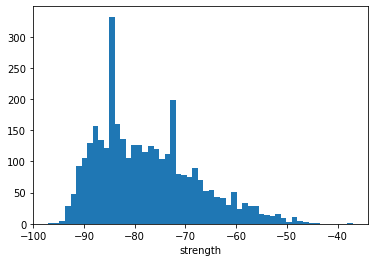

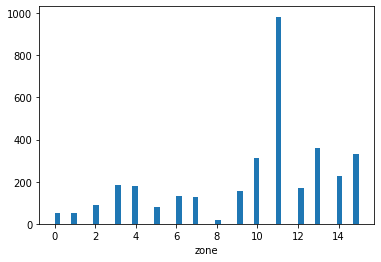

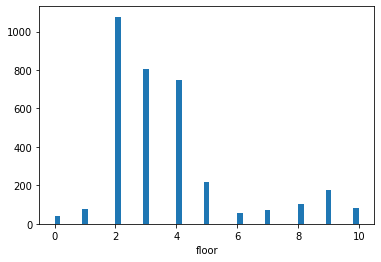

In [11]:
data_for_hist = []
#data_new_2['mac', 'strength']
#data_for_hist.append(data_new_2.columns[2])
data_for_hist.append(data_new_2.columns[3])
data_for_hist.append(data_new_2.columns[5])
data_for_hist.append(data_new_2.columns[6])
for col in data_for_hist:
    plt.hist(data[col], 55)
    plt.xlabel(col)
    plt.show()

In [4]:
data2.shape

(4535, 8)

In [5]:
data2.isnull().sum()

n             0
id            0
mac           0
strength      0
ssid        464
zone          0
floor         0
datetime      0
dtype: int64

In [56]:
zone2 = data2['zone']
zones2 = np.sort(zone2.unique())
floores2 = np.sort(data2['floor'].unique())
zones2, floores2

(array([ 2,  3,  4,  5,  6,  9, 10, 11, 12, 13, 14, 15], dtype=int64),
 array([1, 2, 3, 4, 5], dtype=int64))

In [47]:
zones1 = np.sort(data_new_2['zone'].unique())
floores1 = np.sort(data_new_2['floor'].unique())
zones1, floores1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64))

In [114]:
#самый сильный сигнал за измерение
mesures2 = data2['datetime'].unique()
print("macro                ", 'zone', 'floor', 'ssid', sep='\t')
for mesure in mesures2:
    sample = data2.where(data2['datetime'] == mesure).dropna().sort_values(by=['strength']).tail(1).to_numpy()[0]
    #ssid = sample[4]
    #if ssid == 'bmstu_lb' or ssid == 'bmstu_staff' or ssid == 'bmstu_guest' or
    print(sample[2], sample[5], sample[6], sample[4], sep='\t')

macro                	zone	floor	ssid
9e:93:4e:39:c7:f5	5.0	2.0	DIRECT-XyPhaser 3020
cc:5d:4e:fc:9b:56	4.0	2.0	ZyXEL_KEENETIC_GIGA_FC9B56
cc:5d:4e:fc:9b:56	4.0	2.0	ZyXEL_KEENETIC_GIGA_FC9B56
cc:5d:4e:fc:9b:56	4.0	2.0	ZyXEL_KEENETIC_GIGA_FC9B56
0a:c5:e1:a9:2e:d9	4.0	2.0	AndroidAP2ed9
c0:25:5c:82:26:51	4.0	2.0	bmstu_staff
50:ff:20:1c:c0:1b	4.0	2.0	e10-a3
5c:f4:ab:ce:c1:d8	4.0	2.0	Keenetic-0409
c0:25:5c:82:1d:bf	10.0	2.0	bmstu_lb
c0:25:5c:82:1d:b9	10.0	2.0	bmstu_guest
c0:25:5c:82:1d:b1	10.0	2.0	bmstu_staff
c0:25:5c:82:1d:b1	10.0	2.0	bmstu_staff
86:f3:eb:77:18:40	10.0	2.0	RAD+10011241472
c0:25:5c:82:1d:b0	14.0	2.0	bmstu_lb
c0:25:5c:82:1d:b0	14.0	2.0	bmstu_lb
00:22:55:57:51:80	14.0	2.0	bmstu_staff
00:22:55:57:51:80	14.0	2.0	bmstu_staff
00:22:55:57:51:80	14.0	2.0	bmstu_staff
00:22:55:57:51:80	14.0	2.0	bmstu_staff
00:22:55:57:51:80	14.0	2.0	bmstu_staff
00:22:55:57:51:80	14.0	2.0	bmstu_staff
d4:ca:6d:4c:eb:3d	9.0	2.0	IU4-net
00:22:55:57:51:80	14.0	2.0	bmstu_staff
00:22:55:57:51:80	14.0	2.0	bms

18:0f:76:c3:86:6f	9.0	5.0	mobila
02:15:99:a6:a6:aa	9.0	5.0	DIRECT-szSCX-3400Gnusmas
00:26:52:d8:84:79	14.0	5.0	bmstu_guest
00:26:52:d8:7b:d0	14.0	5.0	bmstu_lb
00:26:52:d8:7b:d0	14.0	5.0	bmstu_lb
00:26:52:d8:7b:d1	14.0	5.0	bmstu_staff
00:26:52:d8:7b:d1	14.0	5.0	bmstu_staff
00:26:52:d8:7b:d0	14.0	5.0	bmstu_lb
00:26:52:d8:7b:d0	14.0	5.0	bmstu_lb
c0:3f:0e:e1:5c:4c	14.0	5.0	rk9-metodroom
c0:3f:0e:e1:5c:4c	14.0	5.0	rk9-metodroom
00:26:52:d8:86:30	14.0	5.0	bmstu_lb
00:26:52:d8:86:39	10.0	5.0	bmstu_guest
00:26:52:d8:86:30	10.0	5.0	bmstu_lb
00:26:52:d8:86:30	10.0	5.0	bmstu_lb
00:26:52:d8:86:30	10.0	5.0	bmstu_lb
00:26:52:d8:86:31	10.0	5.0	bmstu_staff
86:f3:eb:77:18:40	10.0	5.0	RAD+10011241472
00:26:52:d8:86:30	10.0	5.0	bmstu_lb
38:6b:1c:10:0b:70	11.0	5.0	BIO
38:6b:1c:10:0b:70	11.0	5.0	BIO
38:6b:1c:10:0b:70	11.0	5.0	BIO
00:26:52:d8:74:91	11.0	5.0	bmstu_staff
00:26:52:d8:74:91	11.0	5.0	bmstu_staff
00:26:52:d8:74:99	11.0	5.0	bmstu_guest
00:26:52:d8:74:99	11.0	5.0	bmstu_guest
50:17:ff:de:06:e1	12.0	

In [96]:
data2.where(data2['floor'] == 2).dropna()['datetime'].unique()

array(['Tue Apr 13 17:14:45 GMT+03:00 2021',
       'Tue Apr 13 17:15:03 GMT+03:00 2021',
       'Tue Apr 13 17:15:13 GMT+03:00 2021',
       'Tue Apr 13 17:15:25 GMT+03:00 2021',
       'Tue Apr 13 17:15:30 GMT+03:00 2021',
       'Tue Apr 13 17:15:34 GMT+03:00 2021',
       'Tue Apr 13 17:15:40 GMT+03:00 2021',
       'Tue Apr 13 17:15:46 GMT+03:00 2021',
       'Tue Apr 13 17:16:06 GMT+03:00 2021',
       'Tue Apr 13 17:16:19 GMT+03:00 2021',
       'Tue Apr 13 17:16:29 GMT+03:00 2021',
       'Tue Apr 13 17:16:49 GMT+03:00 2021',
       'Tue Apr 13 17:17:01 GMT+03:00 2021',
       'Tue Apr 13 17:17:13 GMT+03:00 2021',
       'Tue Apr 13 17:17:22 GMT+03:00 2021',
       'Tue Apr 13 17:17:27 GMT+03:00 2021',
       'Tue Apr 13 17:17:32 GMT+03:00 2021',
       'Tue Apr 13 17:17:44 GMT+03:00 2021',
       'Tue Apr 13 17:17:47 GMT+03:00 2021',
       'Tue Apr 13 17:17:54 GMT+03:00 2021',
       'Tue Apr 13 17:18:04 GMT+03:00 2021',
       'Tue Apr 13 17:18:21 GMT+03:00 2021',
       'Tu

In [62]:
#количество измерений по этажам
for floor in floores2:
    print(data2.where(data2['floor'] == floor).dropna()['datetime'].unique().size)

3
101
61
46
38


In [61]:
#количество измерений по зонам
for zone in zones2:
    print(data2.where(data2['zone'] == zone).dropna()['datetime'].unique().size)

11
24
16
7
17
27
38
26
12
13
45
13


In [4]:
ssid_normal_list = pd.read_table("ssid_list_advanced_reduced.txt")

In [12]:
ssid_normal_list[['ssid']].head()

,ssid
0,!wifipress
1,!wifipress_guest
2,335_Y-2
3,335_Y-5
4,350


In [6]:
ssid_normal_array = ssid_normal_list.to_numpy().T[1]
ssid_normal_array

array(['!wifipress', '!wifipress_guest', '335_Y-2', '335_Y-5', '350',
       '350_5G', '354a', '363b', '401-au', '410_2.4G', '410_5G',
       '426_asp', '492_10', '704_1', 'ASUS', 'ASUS_5G', 'ASUS_EBM7',
       'BIO', 'BIO_5G', 'BP-Sec', 'BaumanPress', 'CAFSTATION', 'CM10-700',
       'CM10-700 5', 'CM10-700 GUEST', 'DOM.RU Wi-Fi', 'Discovery',
       'Fiber Optics Lab', 'GUK-BIO', 'Gags PRO', 'Hololab',
       'Hololab_guest', 'Hotspot 2.0', 'IU1-603', 'IU3_511u_WiFi',
       'IU3_511u_WiFi_5G', 'IU3_Stud_WiFI', 'IU3_Stud_WiFI_5G', 'IU4-net',
       'IU4-net-2', 'IU8-5G', 'KID-LAB', 'Kafedra SM10', 'Kafedra SM10 5',
       'Keenetic-0409', 'Keenetic-0409-5G', 'Keenetic-2054',
       'Keenetic-2499', 'Keenetic-2536', 'Keenetic-4046', 'Keenetic-4137',
       'Keenetic-6655', 'Keenetic-7571', 'LaserLab', 'MGTS_GPON_C316',
       'MT1-102', 'MT1-103', 'MT1-109', 'MT1-109-5', 'MT1-110', 'MT1-113',
       'MT1-113-5G', 'MT1-207', 'MT2', 'MT2_5G', 'MT7-216', 'MT7-216_5G',
       'NMKN-RoC', 

In [19]:
data_rel_ssid = data2.combine(ssid_normal_list)

TypeError: combine() missing 1 required positional argument: 'func'